In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [202]:
iris_data = pd.read_csv("Iris.csv",index_col='Id')

In [203]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


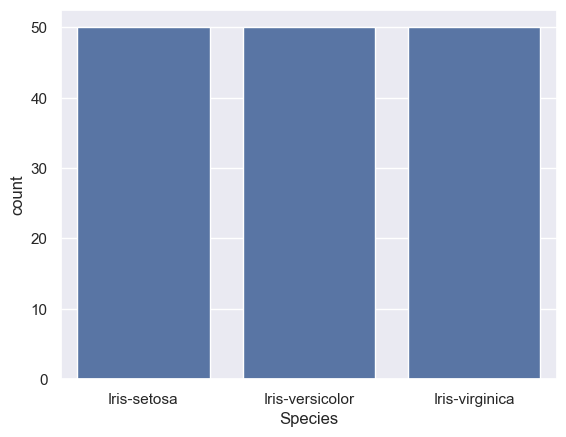

In [204]:
 
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
 
 
sns.countplot(x='Species', data=iris_data, )
plt.show()

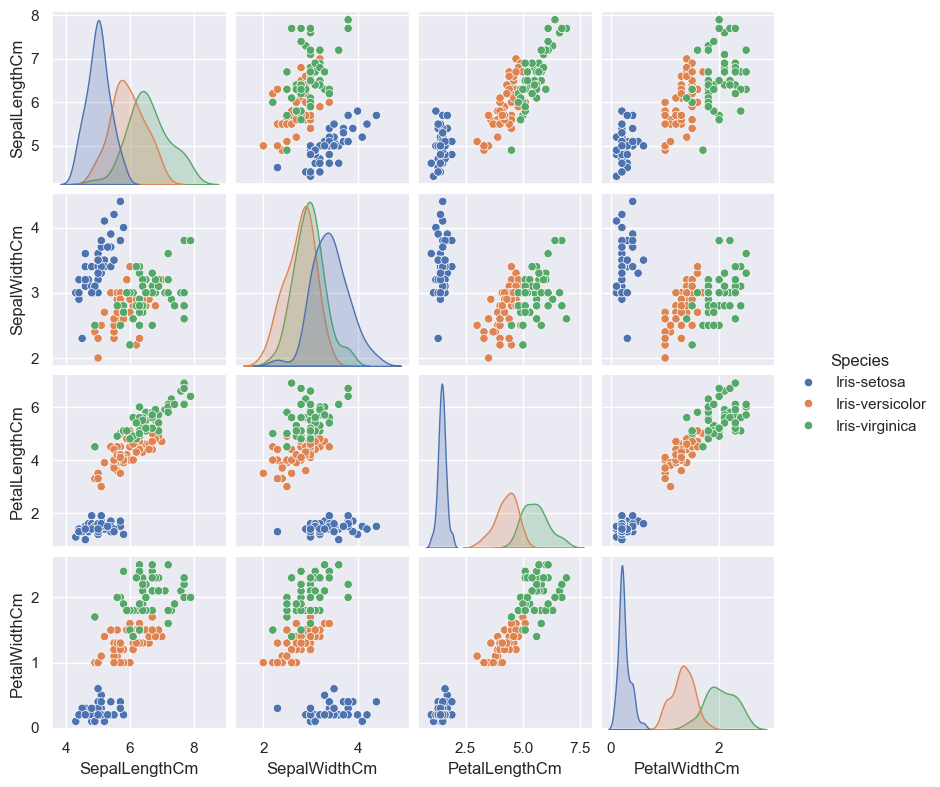

In [205]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt


sns.pairplot(iris_data, hue='Species', height=2)


In [206]:
df_=iris_data.copy()

In [208]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='SepalLengthCm'>

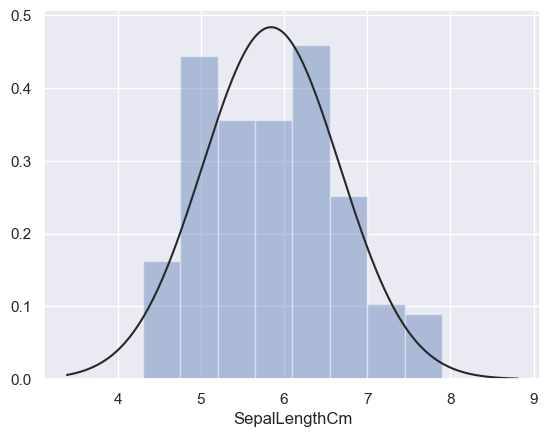

In [209]:
from scipy.stats import norm
sns.distplot(df_['SepalLengthCm'], fit=norm, kde=False)


In [200]:
from scipy.stats import norm
#sns.distplot(df_['SepalWidthCm'], fit=norm, kde=False)


In [126]:
from scipy.stats import norm
#sns.distplot(df_['PetalLengthCm'], fit=norm, kde=False)


In [127]:

#sns.distplot(df_['PetalWidthCm'], fit=norm, kde=False)

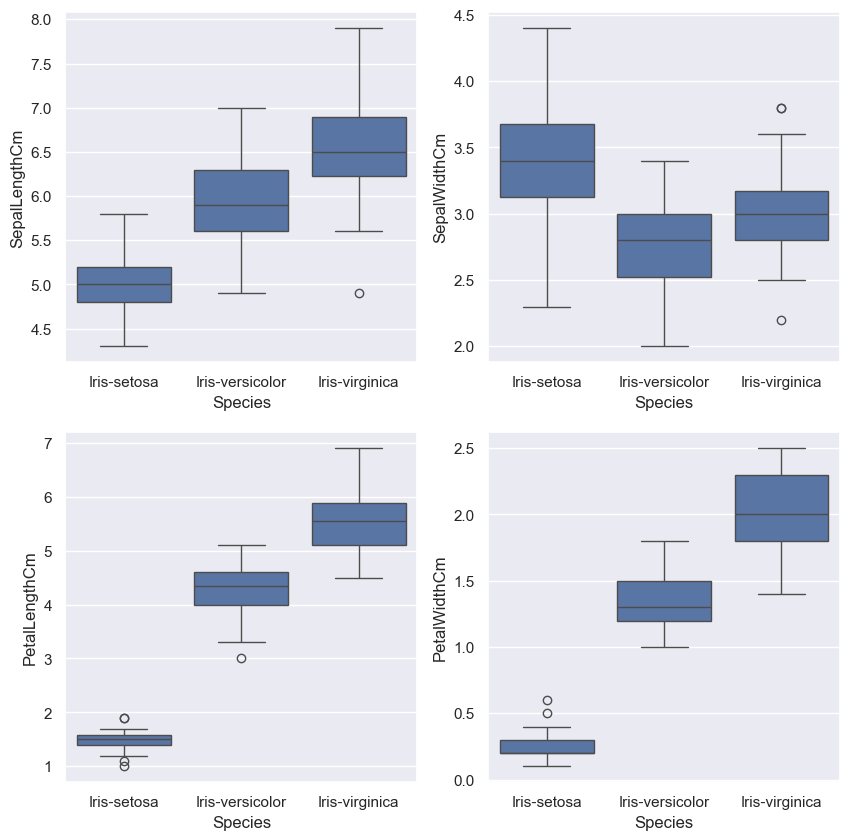

In [210]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
df_data=iris_data.copy()
def graph(y):
	sns.boxplot(x="Species", y=y, data=df_data)

plt.figure(figsize=(10,10))
	
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('SepalLengthCm')

plt.subplot(222)
graph('SepalWidthCm')

plt.subplot(223)
graph('PetalLengthCm')

plt.subplot(224)
graph('PetalWidthCm')

plt.show()


In [211]:
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


# Handling Outliers

In [212]:
 
print(iris_data.median())

SepalLengthCm    5.80
SepalWidthCm     3.00
PetalLengthCm    4.35
PetalWidthCm     1.30
dtype: float64


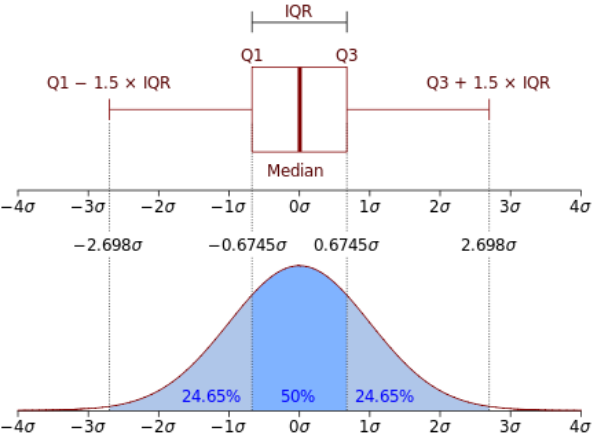

In [29]:
from IPython.display import Image
Image(filename='quartile.png') 

<Axes: xlabel='SepalWidthCm'>

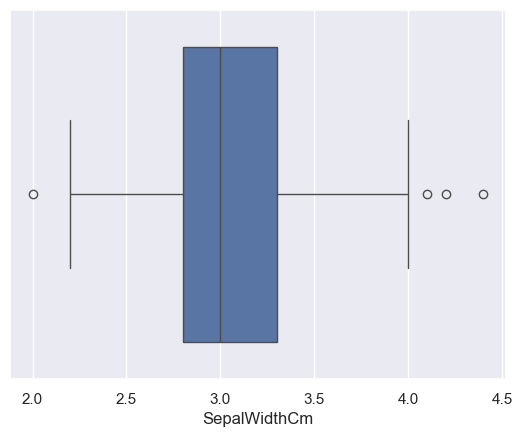

In [213]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

 
sns.boxplot(x='SepalWidthCm', data=iris_data)


## prepare the data

Old Shape:  (150, 6)
New Shape:  (146, 6)


<Axes: xlabel='SepalWidthCm'>

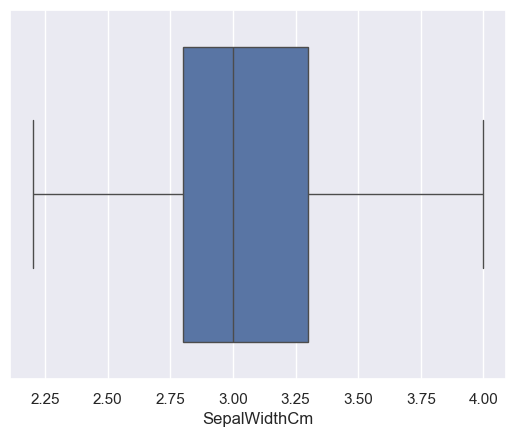

In [214]:
# Load the dataset
df = pd.read_csv('Iris.csv')

# IQR
Q1 = np.percentile(df['SepalWidthCm'], 25,
				method = 'midpoint')

Q3 = np.percentile(df['SepalWidthCm'], 75,
				method = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['SepalWidthCm'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['SepalWidthCm'] <= (Q1-1.5*IQR))

# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)
sns.boxplot(x='SepalWidthCm', data=df)


In [215]:
df.shape

(146, 6)

In [110]:
#sns.boxplot(x='PetalLengthCm', data=df)

In [111]:
#sns.boxplot(x='SepalLengthCm', data=df)

In [112]:
#sns.boxplot(x='SepalWidthCm', data=df)

## 1. Without PCA

In [29]:
df = pd.read_csv('Iris.csv')
df = df.drop(columns=['Id' ])
X = df.drop(['Species'],axis=1)
y = df.Species
df.head(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa


In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=20, stratify=y)

<Axes: >

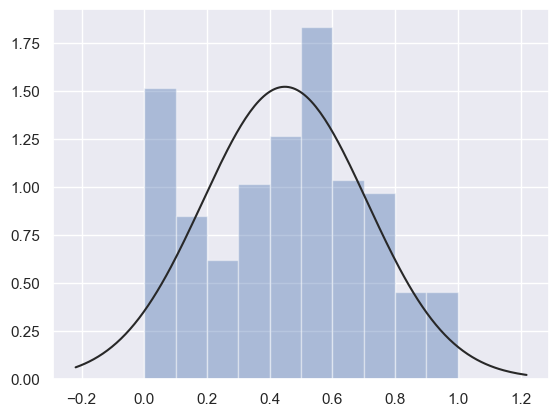

In [31]:
from scipy.stats import norm
sns.distplot(X , fit=norm, kde=False)


### with KNN

In [17]:
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
print("Train score before PCA",knn.score(X_train,y_train),"%")
print("Test score before PCA",knn.score(X_test,y_test),"%")

Train score before PCA 0.9714285714285714 %
Test score before PCA 0.9777777777777777 %


## KNN with PCA

In [18]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)

In [19]:
pca.get_covariance()

array([[ 0.05290845, -0.00454496,  0.05996621,  0.05982683],
       [-0.00454496,  0.03263959, -0.02271983, -0.02048285],
       [ 0.05996621, -0.02271983,  0.08943348,  0.09155279],
       [ 0.05982683, -0.02048285,  0.09155279,  0.1011136 ]])

In [20]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.84141901, 0.11732474, 0.03490564, 0.00635061])

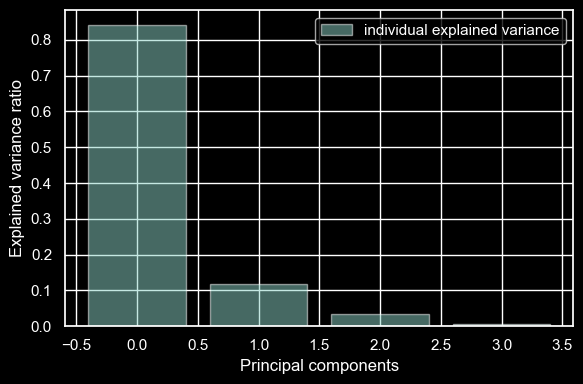

In [21]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [22]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")


Train score after PCA 0.9619047619047619 %
Test score after PCA 0.9777777777777777 %


In [23]:
pca=PCA(n_components=1)
X_new=pca.fit_transform(X)
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")


Train score after PCA 0.9523809523809523 %
Test score after PCA 0.9777777777777777 %


## with SVM

In [33]:
from sklearn import metrics
from sklearn.svm import SVC
 
 
scaler = MinMaxScaler()
X=scaler.fit_transform(X)
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)




svm = SVC(gamma='auto', kernel='linear', probability=True)
svm.fit(X_train_new, y_train) 
y_pred = svm.predict(X_test_new)

#Evaluation
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with SVM: {0:.2f}%".format(precision))
 
 


Accuracy with SVM: 97.78%


## with svm AND PCA

In [34]:
 
pca=PCA(n_components=1)
X_new=pca.fit_transform(X)
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

svm.fit(X_train_new,y_train)
y_pred = svm.predict(X_test_new)
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with SVM: {0:.2f}%".format(precision))
 

Accuracy with SVM: 97.78%


In [35]:
 
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

svm.fit(X_train_new,y_train)
y_pred = svm.predict(X_test_new)
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with SVM: {0:.2f}%".format(precision))
 

Accuracy with SVM: 100.00%
